# Informer Demo

## Download code and dataset

In [ ]:
%cd /content/drive/MyDrive/'Colab Notebooks'/Informer

/content/drive/MyDrive/Colab Notebooks/Informer


In [ ]:
!git clone https://github.com/zhouhaoyi/Informer2020.git
!git clone https://github.com/zhouhaoyi/ETDataset.git
!ls

fatal: destination path 'Informer2020' already exists and is not an empty directory.
fatal: destination path 'ETDataset' already exists and is not an empty directory.
 checkpoints		   ETDataset	  models
'Copy of Informer.ipynb'   Informer2020   results


In [ ]:
import os
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Informer'

In [ ]:
import sys
if not 'Informer2020' in sys.path:
    sys.path += ['Informer2020']

In [ ]:
# !pip install -r ./Informer2020/requirements.txt

## Experiments: Train and Test

In [ ]:
from utils.tools import dotdict
from exp.exp_informer import Exp_Informer
import torch

In [ ]:
args = dotdict()

args.model = 'informer' # model of experiment, options: [informer, informerstack, informerlight(TBD)]

args.data = 'custom' # data
args.root_path = './ETDataset/ETT-small/' # root path of data file
args.data_path = 'pollution.csv' # data file
args.features = 'M' # forecasting task, options:[M, S, MS(TBD)]; M:multivariate predict multivariate, S:univariate predict univariate, MS:multivariate predict univariate
args.target = 'pollution' # target feature in S or MS task
args.freq = 'h' # freq for time features encoding

args.seq_len = 96 # input sequence length of Informer encoder
args.label_len = 48 # start token length of Informer decoder
args.pred_len = 24 # prediction sequence length
# Informer decoder input: concat[start token series(label_len), zero padding series(pred_len)]

args.enc_in = 7 # encoder input size
args.dec_in = 7 # decoder input size
args.c_out = 7 # output size
args.factor = 5 # probsparse attn factor
args.d_model = 512 # dimension of model
args.n_heads = 8 # num of heads
args.e_layers = 3 # num of encoder layers
args.d_layers = 2 # num of decoder layers
args.d_ff = 512 # dimension of fcn in model
args.dropout = 0.05 # dropout
args.attn = 'prob' # attention used in encoder, options:[prob, full]
args.embed = 'timeF' # time features encoding, options:[timeF, fixed, learned]
args.activation = 'gelu' # activation
args.distil = True # whether to use distilling in encoder
args.output_attention = False # whether to output attention in ecoder

args.batch_size = 32 
args.learning_rate = 0.0001
args.loss = 'mse'
args.lradj = 'type1'

args.num_workers = 0
args.itr = 1
args.train_epochs = 6
args.patience = 3
args.des = 'exp'

args.use_gpu = True if torch.cuda.is_available() else False
args.gpu = 0


In [ ]:
# Set augments by using data name
data_parser = {
    'ETTh1':{'data':'ETTh1.csv','T':'OT','M':[7,7,7],'S':[1,1,1],'MS':[7,7,1]},
    'ETTh2':{'data':'ETTh2.csv','T':'OT','M':[7,7,7],'S':[1,1,1],'MS':[7,7,1]},
    'ETTm1':{'data':'ETTm1.csv','T':'OT','M':[7,7,7],'S':[1,1,1],'MS':[7,7,1]},
    'ETTm2':{'data':'ETTm2.csv','T':'OT','M':[7,7,7],'S':[1,1,1],'MS':[7,7,1]},
    'pollution':{'data':'pollution.csv','T':'pollution','M':[8,8,8],'S':[1,1,1],'MS':[8,8,1]}
}
if args.data in data_parser.keys():
    data_info = data_parser[args.data]
    args.data_path = data_info['data']
    args.target = data_info['T']
    args.enc_in, args.dec_in, args.c_out = data_info[args.features]

In [ ]:
args.c_out = 1

In [ ]:
print('Args in experiment:')
print(args)

Args in experiment:
{'model': 'informer', 'data': 'custom', 'root_path': './ETDataset/ETT-small/', 'data_path': 'pollution.csv', 'features': 'M', 'target': 'pollution', 'freq': 'h', 'seq_len': 96, 'label_len': 48, 'pred_len': 24, 'enc_in': 7, 'dec_in': 7, 'c_out': 7, 'factor': 5, 'd_model': 512, 'n_heads': 8, 'e_layers': 3, 'd_layers': 2, 'd_ff': 512, 'dropout': 0.05, 'attn': 'prob', 'embed': 'timeF', 'activation': 'gelu', 'distil': True, 'output_attention': False, 'batch_size': 32, 'learning_rate': 0.0001, 'loss': 'mse', 'lradj': 'type1', 'num_workers': 0, 'itr': 1, 'train_epochs': 6, 'patience': 3, 'des': 'exp', 'use_gpu': True, 'gpu': 0}


In [ ]:
Exp = Exp_Informer

In [ ]:
for ii in range(args.itr):
    # setting record of experiments
    setting = '{}_{}_ft{}_sl{}_ll{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_at{}_eb{}_dt{}_{}_{}'.format(args.model, args.data, args.features, 
                args.seq_len, args.label_len, args.pred_len,
                args.d_model, args.n_heads, args.e_layers, args.d_layers, args.d_ff, args.attn, args.embed, args.distil, args.des, ii)

    # set experiments
    exp = Exp(args)
    
    # train
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp.train(setting)
    
    # test
    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.test(setting)

    torch.cuda.empty_cache()

Use GPU: cuda:0
>>>>>>>start training : informer_custom_ftM_sl96_ll48_pl24_dm512_nh8_el3_dl2_df512_atprob_ebtimeF_dtTrue_exp_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 30540
val 4358
test 8737
	iters: 100, epoch: 1 | loss: 0.2800110
	speed: 0.3659s/iter; left time: 2058.3110s
	iters: 200, epoch: 1 | loss: 1.1784851
	speed: 0.3659s/iter; left time: 2021.6168s
	iters: 300, epoch: 1 | loss: 0.4361880
	speed: 0.3655s/iter; left time: 1982.7921s
	iters: 400, epoch: 1 | loss: 0.2874324
	speed: 0.3654s/iter; left time: 1945.9701s
	iters: 500, epoch: 1 | loss: 0.2395179
	speed: 0.3653s/iter; left time: 1908.8951s
	iters: 600, epoch: 1 | loss: 0.3962795
	speed: 0.3654s/iter; left time: 1872.4849s
	iters: 700, epoch: 1 | loss: 0.2498242
	speed: 0.3654s/iter; left time: 1836.3784s
	iters: 800, epoch: 1 | loss: 0.3203033
	speed: 0.3655s/iter; left time: 1799.9908s
	iters: 900, epoch: 1 | loss: 0.4785600
	speed: 0.3656s/iter; left time: 1764.2601s
Epoch: 1, Steps: 954 | Train Loss: 0.4605223 Vali Loss: 0.33

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Prediction

In [ ]:
import os

# set model path
setting = 'informer_custom_ftM_sl96_ll48_pl24_dm512_nh8_el3_dl2_df512_atprob_ebtimeF_dtTrue_exp_0'
path = os.path.join('./checkpoints/',setting,'checkpoint.pth')

In [ ]:
from data.data_loader import Dataset_ETT_hour
from torch.utils.data import DataLoader

# set prediction dataloader (using test dataloader here)
Data = Dataset_ETT_hour
timeenc = 0 if args.embed!='timeF' else 1
flag = 'test'; shuffle_flag = False; drop_last = True; batch_size = 1

data_set = Data(
    root_path=args.root_path,
    data_path=args.data_path,
    flag=flag,
    size=[args.seq_len, args.label_len, args.pred_len],
    features=args.features,
    target=args.target,
    timeenc=timeenc,
    freq=args.freq
)
data_loader = DataLoader(
    data_set,
    batch_size=batch_size,
    shuffle=shuffle_flag,
    num_workers=args.num_workers,
    drop_last=drop_last)

In [ ]:
from models.model import Informer

# set device
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

args.output_attention = True

# build model
model = Informer(
    args.enc_in,
    args.dec_in, 
    args.c_out, 
    args.seq_len, 
    args.label_len,
    args.pred_len, 
    args.factor,
    args.d_model, 
    args.n_heads, 
    args.e_layers,
    args.d_layers, 
    args.d_ff,
    args.dropout, 
    args.attn,
    args.embed,
    args.freq,
    args.activation,
    args.output_attention,
    args.distil,
    device
)

In [ ]:
print(os.path.abspath(path))
os.path.exists(path)

/content/drive/My Drive/Colab Notebooks/Informer/checkpoints/informer_custom_ftM_sl96_ll48_pl24_dm512_nh8_el3_dl2_df512_atprob_ebtimeF_dtTrue_exp_0/checkpoint.pth


True

In [ ]:
# load parameters
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
model = model.double().to(device)
model.eval()

Informer(
  (enc_embedding): DataEmbedding(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(8, 512, kernel_size=(3,), stride=(1,), padding=(1,), padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (temporal_embedding): TimeFeatureEmbedding(
      (embed): Linear(in_features=4, out_features=512, bias=True)
    )
    (dropout): Dropout(p=0.05, inplace=False)
  )
  (dec_embedding): DataEmbedding(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(8, 512, kernel_size=(3,), stride=(1,), padding=(1,), padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (temporal_embedding): TimeFeatureEmbedding(
      (embed): Linear(in_features=4, out_features=512, bias=True)
    )
    (dropout): Dropout(p=0.05, inplace=False)
  )
  (encoder): Encoder(
    (attn_layers): ModuleList(
      (0): EncoderLayer(
        (attention): AttentionLayer(
          (inner_attention): ProbAttention(
            (dropout): Dropout(p=

In [ ]:
preds = []
trues = []
        
for i, (batch_x,batch_y,batch_x_mark,batch_y_mark) in enumerate(data_loader):
    batch_x = batch_x.double().to(device)
    batch_y = batch_y.double()
    batch_x_mark = batch_x_mark.double().to(device)
    batch_y_mark = batch_y_mark.double().to(device)

    # decoder input = concat[start token series(label_len), zero padding series(pred_len)]
    dec_inp = torch.zeros_like(batch_y[:,-args.pred_len:,:]).double()
    dec_inp = torch.cat([batch_y[:,:args.label_len,:], dec_inp], dim=1).double().to(device)
    
    # encoder - decoder
    if args.output_attention:
        outputs = model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[0]
    else:
        outputs = model(batch_x, batch_x_mark, dec_inp, batch_y_mark)
    batch_y = batch_y[:,-args.pred_len:,:]

    pred = outputs.detach().cpu().numpy()#.squeeze()
    true = batch_y.detach().cpu().numpy()#.squeeze()

    preds.append(pred)
    trues.append(true)

In [ ]:
import numpy as np

preds = np.array(preds)
trues = np.array(trues)

print('prediction shape:', preds.shape, trues.shape) # [num_samples//batch_size, batch_size, pred_len, c_out]
preds = preds.reshape(-1, preds.shape[-2], preds.shape[-1])
trues = trues.reshape(-1, trues.shape[-2], trues.shape[-1])
print('prediction shape:', preds.shape, trues.shape) # [num_samples, pred_len, c_out]

prediction shape: (2857, 1, 24, 8) (2857, 1, 24, 8)
prediction shape: (2857, 24, 8) (2857, 24, 8)


## Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

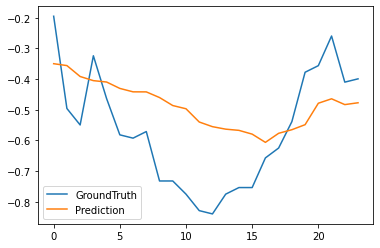

In [ ]:
# draw OT prediction
plt.figure()
plt.plot(trues[0,:,-1], label='GroundTruth')
plt.plot(preds[0,:,-1], label='Prediction')
plt.legend()
plt.show()

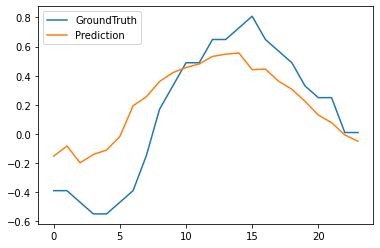

In [ ]:
# draw HUFL prediction
plt.figure()
plt.plot(trues[0,:,1], label='GroundTruth')
plt.plot(preds[0,:,1], label='Prediction')
plt.legend()
plt.show()

In [ ]:
# attention visualization
idx = 0
for i, (batch_x,batch_y,batch_x_mark,batch_y_mark) in enumerate(data_loader):
    if i!=idx:
        continue
    batch_x = batch_x.double().to(device)
    batch_y = batch_y.double()

    batch_x_mark = batch_x_mark.double().to(device)
    batch_y_mark = batch_y_mark.double().to(device)
    
    dec_inp = torch.zeros_like(batch_y[:,-args.pred_len:,:]).double()
    dec_inp = torch.cat([batch_y[:,:args.label_len,:], dec_inp], dim=1).double().to(device)
    
    outputs,attn = model(batch_x, batch_x_mark, dec_inp, batch_y_mark)

In [ ]:
attn[0].shape, attn[1].shape, attn[2].shape

(torch.Size([1, 8, 96, 96]),
 torch.Size([1, 8, 49, 49]),
 torch.Size([1, 8, 26, 26]))

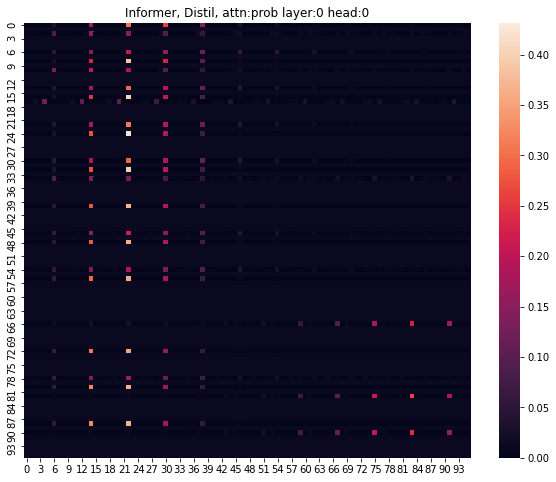

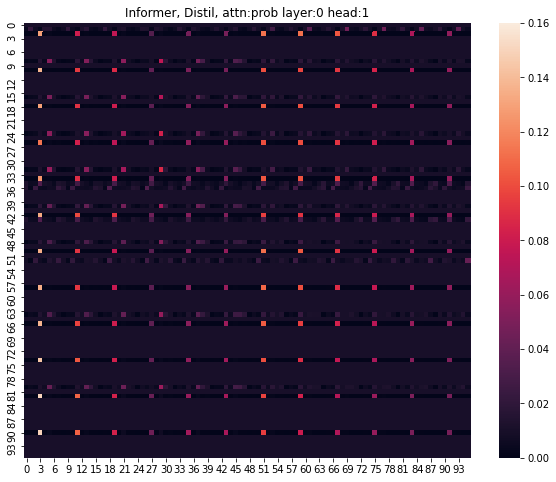

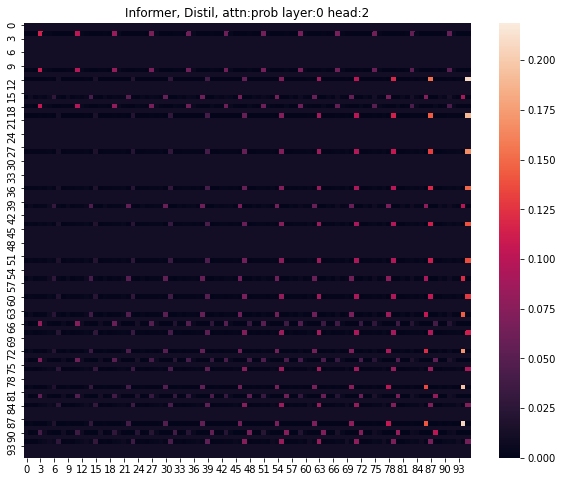

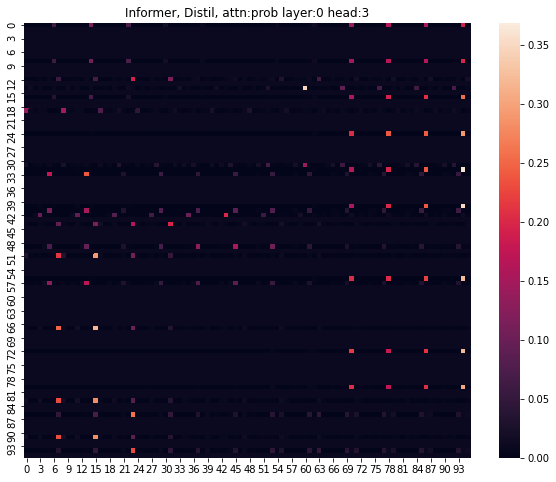

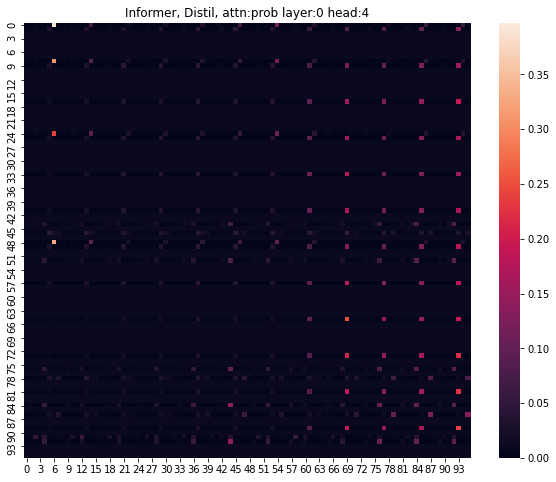

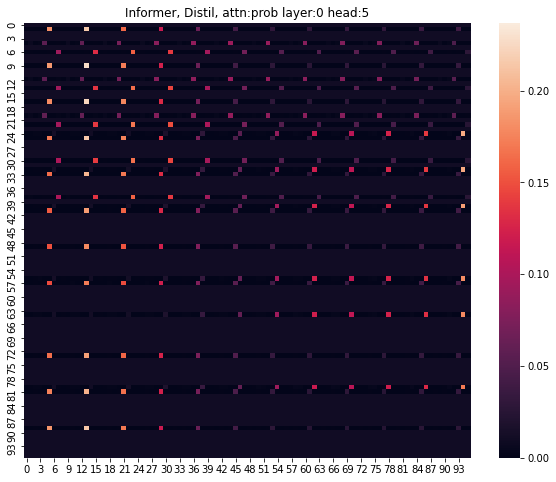

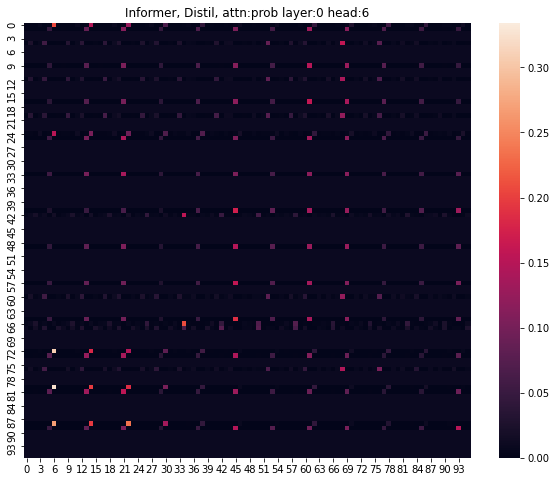

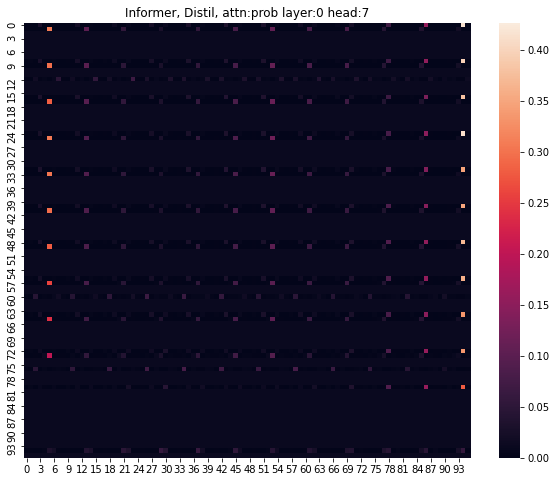

In [ ]:
layer = 0
distil = 'Distil' if args.distil else 'NoDistil'
for h in range(0,8):
    plt.figure(figsize=[10,8])
    plt.title('Informer, {}, attn:{} layer:{} head:{}'.format(distil, args.attn, layer, h))
    A = attn[layer][0,h].detach().cpu().numpy()
    ax = sns.heatmap(A, vmin=0, vmax=A.max()+0.01)
    plt.show()

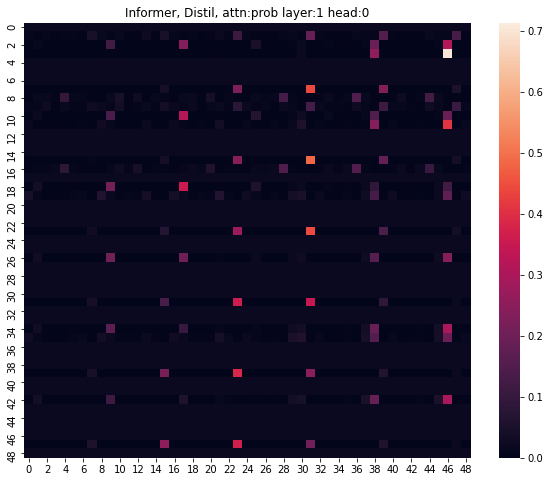

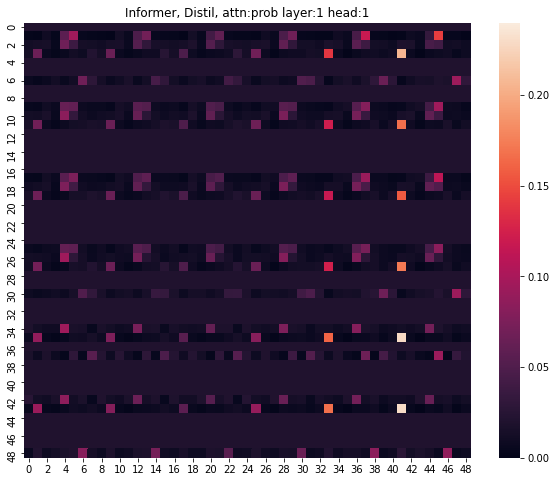

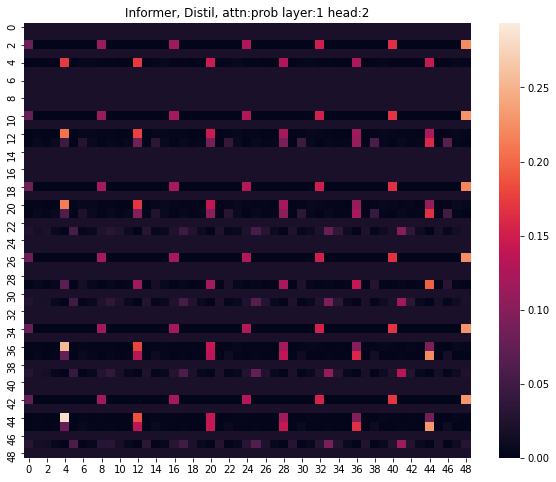

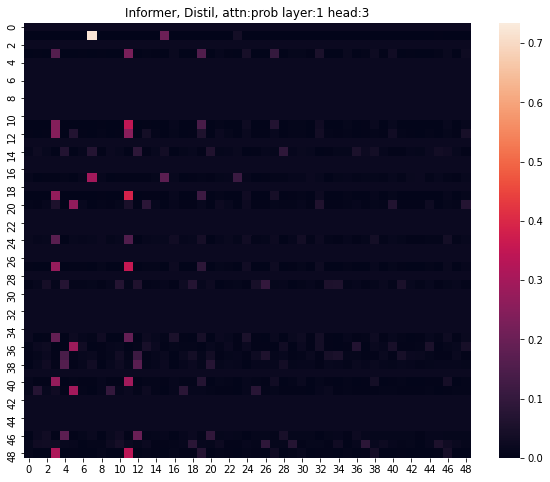

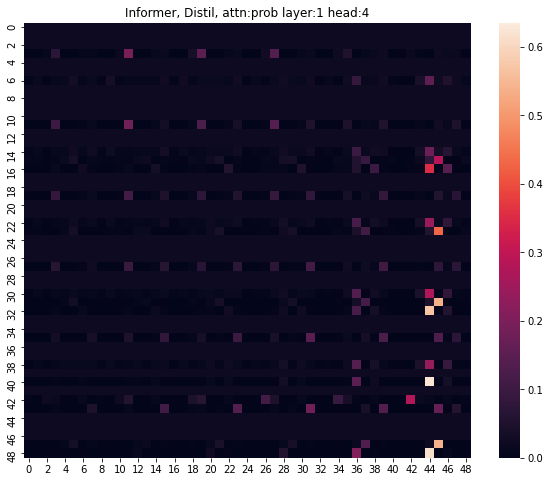

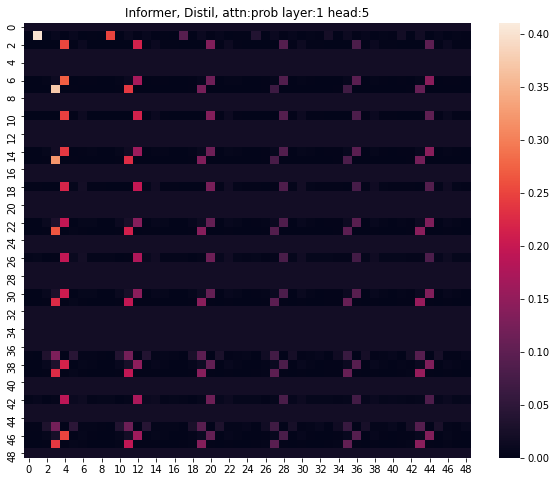

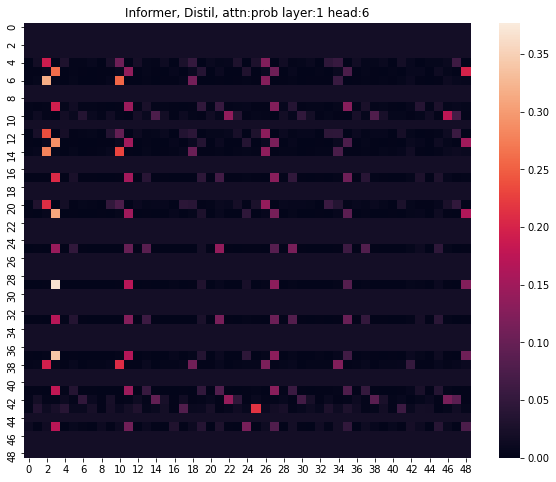

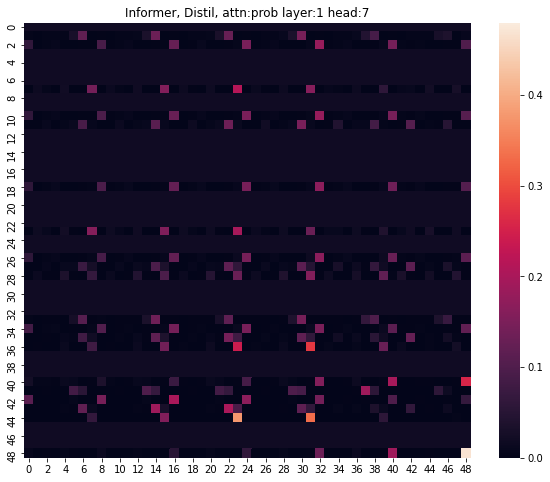

In [ ]:
layer = 1
distil = 'Distil' if args.distil else 'NoDistil'
for h in range(0,8):
    plt.figure(figsize=[10,8])
    plt.title('Informer, {}, attn:{} layer:{} head:{}'.format(distil, args.attn, layer, h))
    A = attn[layer][0,h].detach().cpu().numpy()
    ax = sns.heatmap(A, vmin=0, vmax=A.max()+0.01)
    plt.show()

## Custom Data

Custom data (xxx.csv) has to include at least 2 features: `date`(format: `YYYY-MM-DD hh:mm:ss`) and `target feature`.


In [ ]:
from data.data_loader import Dataset_Custom
from torch.utils.data import DataLoader
import pandas as pd
import os

In [ ]:
# custom data: xxx.csv
# data features: ['date', ...(other features), target feature]

# we take ETTh2 as an example
args.root_path = './ETDataset/ETT-small/'
args.data_path = 'pollution.csv'

df = pd.read_csv(os.path.join(args.root_path, args.data_path))

In [ ]:
df.to_csv('pollution2.csv',index=0)

In [ ]:
df.head()

,date,dew,temp,press,wnd_spd,snow,rain,pollution
0,2010-01-02 00:00:00,-16,-4.0,1020.0,1.79,0,0,129.0
1,2010-01-02 01:00:00,-15,-4.0,1020.0,2.68,0,0,148.0
2,2010-01-02 02:00:00,-11,-5.0,1021.0,3.57,0,0,159.0
3,2010-01-02 03:00:00,-7,-5.0,1022.0,5.36,1,0,181.0
4,2010-01-02 04:00:00,-7,-5.0,1022.0,6.25,2,0,138.0


In [ ]:
'''
We set 'HULL' as target instead of 'OT'

The following frequencies are supported:
        Y   - yearly
            alias: A
        M   - monthly
        W   - weekly
        D   - daily
        B   - business days
        H   - hourly
        T   - minutely
            alias: min
'''

args.target = 'pollution'
args.freq = 'h'

Data = Dataset_Custom
timeenc = 0 if args.embed!='timeF' else 1
flag = 'test'; shuffle_flag = False; drop_last = True; batch_size = 1

data_set = Data(
    root_path=args.root_path,
    data_path=args.data_path,
    flag=flag,
    size=[args.seq_len, args.label_len, args.pred_len],
    features=args.features,
    timeenc=timeenc,
    target=args.target, # HULL here
    freq=args.freq # 'h': hourly, 't':minutely
)
data_loader = DataLoader(
    data_set,
    batch_size=batch_size,
    shuffle=shuffle_flag,
    num_workers=args.num_workers,
    drop_last=drop_last)

In [ ]:
batch_x,batch_y,batch_x_mark,batch_y_mark = data_set[0]

In [ ]:
batch_x, batch_x_mark

(array([[-1.49287475, -1.43008662,  1.00475206, -1.14540304, -0.42888641,
         -0.07943754, -0.14002941, -0.69080236],
        [-1.35343289, -1.18771098,  1.00475206, -1.14540304, -0.34996711,
         -0.07943754, -0.14002941, -0.78713778],
        [-1.28371196, -1.1069191 ,  1.00475206, -1.14540304, -0.23590712,
         -0.07943754, -0.14002941, -0.86206533],
        [-1.28371196, -1.18771098,  1.00475206, -1.14540304, -0.0955407 ,
         -0.07943754, -0.14002941, -0.8834732 ],
        [-1.35343289, -1.26850286,  1.00475206, -1.14540304, -0.01662139,
         -0.07943754, -0.14002941, -0.86206533],
        [-1.49287475, -1.18771098,  1.00475206, -1.14540304,  0.12374503,
         -0.07943754, -0.14002941, -0.82995352],
        [-1.49287475, -1.26850286,  1.00475206, -1.14540304,  0.28177995,
         -0.07943754, -0.14002941, -0.87276926],
        [-1.49287475, -1.26850286,  1.00475206, -1.14540304,  0.42214638,
         -0.07943754, -0.14002941, -0.85136139],
        [-1.4928